In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from google.colab import files
from keras.utils import plot_model
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

# Part 1 Keras Sequential API
## 1. Linear model
Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [6]:
# Linear model to classify the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4673 - acc: 0.8777 - val_loss: 0.3115 - val_acc: 0.9156
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3042 - acc: 0.9154 - val_loss: 0.2845 - val_acc: 0.9198
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2833 - acc: 0.9213 - val_loss: 0.2744 - val_acc: 0.9233
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2730 - acc: 0.9237 - val_loss: 0.2756 - val_acc: 0.9225
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2665 - acc: 0.9255 - val_loss: 0.2711 - val_acc: 0.9246


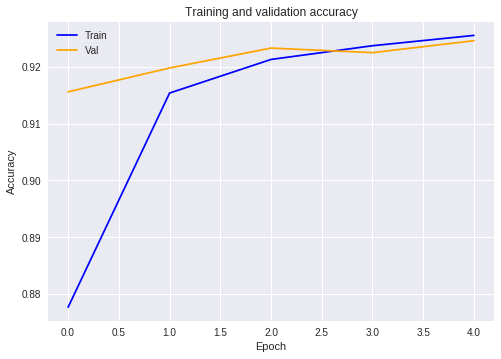

In [10]:
# The history object contains results on the training and test
# sets for each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 2. Deep model
Implement and train a deep neural network to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.


In [11]:
model2 = Sequential([
  Flatten(),
  Dense(256, 'relu'),
  Dense(128, 'relu'),
  Dense(10, 'softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2058 - acc: 0.9384 - val_loss: 0.1055 - val_acc: 0.9670
Epoch 2/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0876 - acc: 0.9733 - val_loss: 0.0866 - val_acc: 0.9737
Epoch 3/5
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0627 - acc: 0.9807 - val_loss: 0.0706 - val_acc: 0.9780
Epoch 4/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0445 - acc: 0.9859 - val_loss: 0.0791 - val_acc: 0.9756
Epoch 5/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0344 - acc: 0.9886 - val_loss: 0.0795 - val_acc: 0.9768


## 3. Plot 2 models
Produce a diagram that visualizes your linear and deep models using ​plot_model​. You can find a complete example of how to use plot model ​here​. Include these plots with your submission.

In [15]:
plot_model(model, show_shapes=True, to_file='linearModel.png')
plt.figure(dpi=100)
files.download('linearModel.png')
plot_model(model2, show_shapes=True, to_file='deepModel.png')
plt.figure(dpi=100)
files.download('deepModel.png')

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

## 4. Confusion matrix
Produce a confusion matrix for one of your models. You can reuse the sklearn ​code​ (it’s great). You’ll need to use your model to make predictions on the images in the test set, and compare them with the correct answer. Include the confusion matrix in your submission.

*Evaluate classification quality with diagonal elements representing right predictions and off-diagonal elements representing mislabled.

In [23]:
# Compute confusion matrix for linear model
from sklearn.metrics import confusion_matrix
linear_pred = model.predict(x_test)
y_linear = []
for i in range(len(y_test)):
  y_linear.append(np.argmax(linear_pred[i]))
cmatrix_linear = confusion_matrix(y_test, y_linear)
cmatrix_linear

array([[ 968,    0,    1,    1,    0,    4,    2,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  10,   12,  915,   16,    8,    4,   13,    8,   41,    5],
       [   5,    0,   21,  910,    0,   25,    2,   10,   26,   11],
       [   1,    1,    3,    1,  907,    0,   11,    3,    7,   48],
       [  13,    3,    2,   29,   12,  767,   14,    8,   35,    9],
       [  16,    3,    7,    1,    8,   12,  907,    2,    2,    0],
       [   2,    6,   22,    5,    9,    0,    0,  939,    1,   44],
       [  10,   11,    5,   13,    9,   20,    8,   10,  871,   17],
       [  11,    7,    1,    8,   16,    3,    0,   12,    7,  944]])

# Part 2 Keras Subclassing API
## 5. Linear model
Implement and train a linear model to classify this dataset. Evaluate it by producing a plot that compares the training and validation accuracy. Include this plot with your submission.

In [11]:
print("You have version", tf.__version__)
assert tf.__version__ >= "2.0"

You have version 2.0.0-dev20190212


In [0]:
# After set version 2, run the first block again for import.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

# Batch and shuffle data
BATCH_SIZE = 128
BUFFER_SIZE = len(x_train)

mnist_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
mnist_test = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [18]:
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    #self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    #x = self.d1(x)
    return self.d2(x)
  
model = LinearModel()
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)
  

def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)
  

EPOCHS = 5
acc = []
val_acc = []

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
  acc.append(train_accuracy_metric.result())
  val_acc.append(test_accuracy_metric.result())

Epoch 1, Loss: 0.6703, Accuracy: 83.62, Test loss: 0.3792, Test accuracy: 90.19
Epoch 2, Loss: 0.5155, Accuracy: 86.93, Test loss: 0.3480, Test accuracy: 90.71
Epoch 3, Loss: 0.4500, Accuracy: 88.36, Test loss: 0.3301, Test accuracy: 91.04
Epoch 4, Loss: 0.4124, Accuracy: 89.18, Test loss: 0.3184, Test accuracy: 91.28
Epoch 5, Loss: 0.3874, Accuracy: 89.74, Test loss: 0.3100, Test accuracy: 91.47


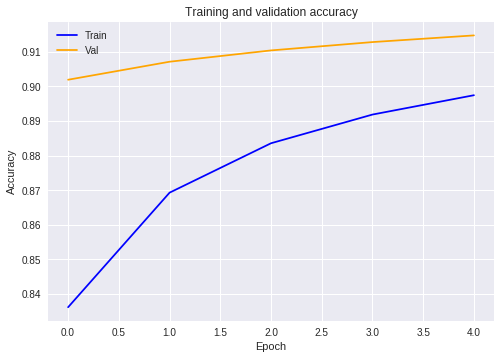

In [19]:
# The history object contains results on the training and test
# sets for each epoch

# Get the number of epochs
epochs = range(EPOCHS)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## 6. Deep model
Implement and train a deep model to classify this dataset. No need to produce plots for this part, just try to get the validation accuracy as high as you can.

In [20]:
# From example
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)
  
model = MyModel()
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam()

train_loss_metric = tf.keras.metrics.Mean(name='train_loss')
test_loss_metric = tf.keras.metrics.Mean(name='test_loss')

train_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')


def train_step(images, labels):
  with tf.GradientTape() as tape:    
    # Forward pass
    predictions = model(images)
    train_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Backward pass
  gradients = tape.gradient(train_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Record results
  train_loss_metric(train_loss)
  train_accuracy_metric(labels, predictions)
  

def test_step(images, labels):
  predictions = model(images)
  test_loss = loss_function(y_true=labels, y_pred=predictions)
  
  # Record results
  test_loss_metric(test_loss)
  test_accuracy_metric(labels, predictions)
  

EPOCHS = 5
# acc = []
# val_acc = []

for epoch in range(EPOCHS):
  for images, labels in mnist_train:
    train_step(images, labels)
  
  for test_images, test_labels in mnist_test:
    test_step(test_images, test_labels)
  
  template = 'Epoch {}, Loss: {:.4f}, Accuracy: {:.2f}, Test loss: {:.4f}, Test accuracy: {:.2f}'
  print (template.format(epoch +1, 
                         train_loss_metric.result(), 
                         train_accuracy_metric.result() * 100, 
                         test_loss_metric.result(), 
                         test_accuracy_metric.result() * 100))
#   acc.append(train_accuracy_metric.result())
#   val_acc.append(test_accuracy_metric.result())

Epoch 1, Loss: 0.3511, Accuracy: 90.54, Test loss: 0.1838, Test accuracy: 94.83
Epoch 2, Loss: 0.2560, Accuracy: 93.01, Test loss: 0.1570, Test accuracy: 95.49
Epoch 3, Loss: 0.2087, Accuracy: 94.27, Test loss: 0.1397, Test accuracy: 95.94
Epoch 4, Loss: 0.1783, Accuracy: 95.08, Test loss: 0.1275, Test accuracy: 96.25
Epoch 5, Loss: 0.1567, Accuracy: 95.67, Test loss: 0.1186, Test accuracy: 96.48


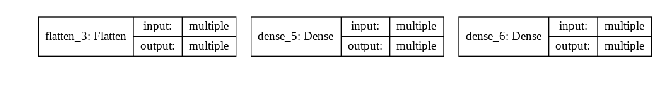

In [28]:
# show the deep model
import matplotlib.image as mpimg
plot_model(model, show_shapes=True,to_file='test.png')
plt.figure(dpi=100)
plt.axis('off')
imgplot=plt.imshow(mpimg.imread('test.png'))
plt.show()